**Team-26-Developing-an-opinionated-sales-forecasting-MVP**

In [1]:
pip install downcast

Note: you may need to restart the kernel to use updated packages.


In [2]:
#importing the libriries to use
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.tree import export_graphviz
from IPython.display import Image  
import matplotlib.pyplot as plt
import pickle
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px
from downcast import reduce
import warnings
warnings.filterwarnings("ignore")
import matplotlib.ticker as ticker
import matplotlib.dates as dates

**Knowledge:**

sales_train_validation has data of 30490 rows for all stores and has columns (1919).The first column id is actually a combination of all the previously mentioned ids and also added with a string validation. The rest of the columns are from d_1 to d_1913 which shows the number of units sold on that particular day(column) of a particular product id(row).
The calendar file has special events and SNAP columns to show the variation in sales on particular days.
The sell_prices file has prices for each product(sell_price) in a particular week of a year using unique id — wm_yr_wk.

***understanding the dataset.***

The following table lists down various attributes found in the dataset along with their descriptions:-

**Column Descriptions for calendar.csv**

	Column Name	    Descriptions
	date	        Date
	wm_yr_wk	    (not sure) looks like some sort of combination of year and week
    weekday 	    Day of the week
    wday    	    weekday encoded
	month	        month of the year
        d	        signifying which day it is in absolute term. All values are unique
	event_name_1	Name of the primary event, e.g. Super Bowl etc. 29 events and 1 null
	event_type_1	Type of event. Whether it is Sporting or Cultural or National or Religious
	event_name_2	Second event, if any. Only 5 values, rest is null
	event_type_2	Type of event
    snap_CA         Whether SNAP food stamp is there or not for California state
	snap_TX 	    Whether SNAP food stamp is there or not for Texas state
	snap_WI 	    Whether SNAP food stamp is there or not for Wisconsin state

**column description for sale_validation**

	Column Name	    Description
	id	            combination of below IDs and a validation flag
	item_id	        Item ID
	dept_id	        Department ID
	store_id	    Store ID
	state_id	    State ID
	d_1 to d_1969	day wise units sold

**column description for sell prices csv**

	Column Name	    Description
	store_id	    maps to store_id of Sales Train Validation table
	item_id	        item id
	wm_yr_wk	    described above
	sell prices	    Price during that particular wm_yr_wk

In [3]:
#reading clandar data
calendar_df = pd.read_csv(r"\Users\Lenovo\Downloads\coursework_docs\Team_26_Developing_an_opinionated_sales_forecasting_MVP\calendar.csv")

In [4]:
calendar_df.head(10)

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1
5,2011-02-03,11101,Thursday,6,2,2011,d_6,NaN,NaN,NaN,NaN,1,1,1
6,2011-02-04,11101,Friday,7,2,2011,d_7,NaN,NaN,NaN,NaN,1,0,0
7,2011-02-05,11102,Saturday,1,2,2011,d_8,NaN,NaN,NaN,NaN,1,1,1
8,2011-02-06,11102,Sunday,2,2,2011,d_9,SuperBowl,Sporting,NaN,NaN,1,1,1
9,2011-02-07,11102,Monday,3,2,2011,d_10,NaN,NaN,NaN,NaN,1,1,0


In [5]:
#viewing the calendar data info
calendar_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1969 entries, 0 to 1968
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          1969 non-null   object
 1   wm_yr_wk      1969 non-null   int64 
 2   weekday       1969 non-null   object
 3   wday          1969 non-null   int64 
 4   month         1969 non-null   int64 
 5   year          1969 non-null   int64 
 6   d             1969 non-null   object
 7   event_name_1  162 non-null    object
 8   event_type_1  162 non-null    object
 9   event_name_2  5 non-null      object
 10  event_type_2  5 non-null      object
 11  snap_CA       1969 non-null   int64 
 12  snap_TX       1969 non-null   int64 
 13  snap_WI       1969 non-null   int64 
dtypes: int64(7), object(7)
memory usage: 215.5+ KB


In [6]:
calendar_df['year'].unique()

array([2011, 2012, 2013, 2014, 2015, 2016], dtype=int64)

In [7]:
calendar_df['month'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

In [8]:
#checking the size of our data
calendar_df.shape

(1969, 14)

In [9]:
print("unique values for snap WI:",calendar_df['snap_WI'].unique())
print("unique values for snap CA:",calendar_df['snap_CA'].unique())
print("unique values for snap TX :",calendar_df['snap_TX'].unique())

unique values for snap WI: [0 1]
unique values for snap CA: [0 1]
unique values for snap TX : [0 1]


In [10]:
calendar_df['event_name_1'].value_counts()

SuperBowl              6
Pesach End             6
Ramadan starts         6
ValentinesDay          6
NBAFinalsEnd           6
NBAFinalsStart         6
MemorialDay            6
Mother's day           6
Purim End              6
StPatricksDay          6
LentWeek2              6
LentStart              6
PresidentsDay          6
MartinLutherKingDay    5
OrthodoxChristmas      5
EidAlAdha              5
NewYear                5
Chanukah End           5
Christmas              5
Thanksgiving           5
VeteransDay            5
IndependenceDay        5
Halloween              5
ColumbusDay            5
LaborDay               5
Eid al-Fitr            5
Cinco De Mayo          5
OrthodoxEaster         5
Easter                 5
Father's day           4
Name: event_name_1, dtype: int64

In [11]:
calendar_df['event_name_2'].value_counts()

Father's day      2
Easter            1
Cinco De Mayo     1
OrthodoxEaster    1
Name: event_name_2, dtype: int64

In [12]:
calendar_df['event_type_1'].value_counts()

Religious    55
National     52
Cultural     37
Sporting     18
Name: event_type_1, dtype: int64

In [13]:
calendar_df['event_type_2'].value_counts()

Cultural     4
Religious    1
Name: event_type_2, dtype: int64

In [14]:
#checking for missing values
calendar_df.isnull().sum()

date               0
wm_yr_wk           0
weekday            0
wday               0
month              0
year               0
d                  0
event_name_1    1807
event_type_1    1807
event_name_2    1964
event_type_2    1964
snap_CA            0
snap_TX            0
snap_WI            0
dtype: int64

***Note that there are missing values inside of the calendar data but this can be explained since its only in the events column. we assume that this events do not run all year round therefore we consider this not to be real missing values***

**Alternatively we could fill the nan\null values with a string object "NoEvent"**

In [15]:
#calendar_df = calendar_df.fillna('NoEvent')

#calendar_df.date = calendar_df.date.astype('datetime64')
#calendar_df.snap_CA = calendar_df.snap_CA.astype('bool')
#calendar_df.snap_TX = calendar_df.snap_TX.astype('bool')
#calendar_df.snap_WI = calendar_df.snap_WI.astype('bool')
#calendar_df.weekday = calendar_df.weekday.astype('string')
#calendar_df.event_name_1 = calendar_df.event_name_1.astype('string')
#calendar_df.event_type_1 = calendar_df.event_type_1.astype('string')
#calendar_df.event_name_2 = calendar_df.event_name_2.astype('string')
#calendar_df.event_type_2 = calendar_df.event_type_2.astype('string')

In [16]:
calendar_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1969 entries, 0 to 1968
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          1969 non-null   object
 1   wm_yr_wk      1969 non-null   int64 
 2   weekday       1969 non-null   object
 3   wday          1969 non-null   int64 
 4   month         1969 non-null   int64 
 5   year          1969 non-null   int64 
 6   d             1969 non-null   object
 7   event_name_1  162 non-null    object
 8   event_type_1  162 non-null    object
 9   event_name_2  5 non-null      object
 10  event_type_2  5 non-null      object
 11  snap_CA       1969 non-null   int64 
 12  snap_TX       1969 non-null   int64 
 13  snap_WI       1969 non-null   int64 
dtypes: int64(7), object(7)
memory usage: 215.5+ KB


In [17]:
calendar_df.isnull().sum()

date               0
wm_yr_wk           0
weekday            0
wday               0
month              0
year               0
d                  0
event_name_1    1807
event_type_1    1807
event_name_2    1964
event_type_2    1964
snap_CA            0
snap_TX            0
snap_WI            0
dtype: int64

In [18]:
calendar_df.head(5)

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1


In [19]:
# check for duplicates
calendar_df.duplicated().any()

False

In [20]:
#reading the sell price data
sellprice_df= pd.read_csv(r"\Users\Lenovo\Downloads\coursework_docs\Team_26_Developing_an_opinionated_sales_forecasting_MVP\sell_prices.csv")

In [21]:
#viewing the first 5 rows
sellprice_df.head(5)

,store_id,item_id,wm_yr_wk,sell_price
0,CA_1,HOBBIES_1_001,11325,9.58
1,CA_1,HOBBIES_1_001,11326,9.58
2,CA_1,HOBBIES_1_001,11327,8.26
3,CA_1,HOBBIES_1_001,11328,8.26
4,CA_1,HOBBIES_1_001,11329,8.26


In [22]:
sellprice_df.shape

(6841121, 4)

In [23]:
sellprice_df['store_id'].unique()

array(['CA_1', 'CA_2', 'CA_3', 'CA_4', 'TX_1', 'TX_2', 'TX_3', 'WI_1',
       'WI_2', 'WI_3'], dtype=object)

In [24]:
sellprice_df['store_id'].value_counts()

TX_2    701214
TX_1    699796
CA_1    698412
WI_3    696094
CA_3    693990
TX_3    691112
CA_4    679025
WI_2    678171
WI_1    665912
CA_2    637395
Name: store_id, dtype: int64

In [25]:
sellprice_df.isnull().sum()

store_id      0
item_id       0
wm_yr_wk      0
sell_price    0
dtype: int64

In [26]:
sellprice_df['wm_yr_wk'].unique()

array([11325, 11326, 11327, 11328, 11329, 11330, 11331, 11332, 11333,
       11334, 11335, 11336, 11337, 11338, 11339, 11340, 11341, 11342,
       11343, 11344, 11345, 11346, 11347, 11348, 11349, 11350, 11351,
       11352, 11353, 11401, 11402, 11403, 11404, 11405, 11406, 11407,
       11408, 11409, 11410, 11411, 11412, 11413, 11414, 11415, 11416,
       11417, 11418, 11419, 11420, 11421, 11422, 11423, 11424, 11425,
       11426, 11427, 11428, 11429, 11430, 11431, 11432, 11433, 11434,
       11435, 11436, 11437, 11438, 11439, 11440, 11441, 11442, 11443,
       11444, 11445, 11446, 11447, 11448, 11449, 11450, 11451, 11452,
       11501, 11502, 11503, 11504, 11505, 11506, 11507, 11508, 11509,
       11510, 11511, 11512, 11513, 11514, 11515, 11516, 11517, 11518,
       11519, 11520, 11521, 11522, 11523, 11524, 11525, 11526, 11527,
       11528, 11529, 11530, 11531, 11532, 11533, 11534, 11535, 11536,
       11537, 11538, 11539, 11540, 11541, 11542, 11543, 11544, 11545,
       11546, 11547,

In [27]:
validation_df = pd.read_csv(r"\Users\Lenovo\Downloads\coursework_docs\Team_26_Developing_an_opinionated_sales_forecasting_MVP\sales_train_validation.csv")

In [28]:
validation_df.head(5)

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,3,0,1,1,1,3,0,1,1
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,2,1,1,1,0,1,1,1
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,5,4,1,0,1,3,7,2
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,1,0,1,1,2,2,2,4


In [29]:
validation_df.shape

(30490, 1919)

In [30]:
validation_df.isnull().sum()

id          0
item_id     0
dept_id     0
cat_id      0
store_id    0
           ..
d_1909      0
d_1910      0
d_1911      0
d_1912      0
d_1913      0
Length: 1919, dtype: int64

In [31]:
evaluation_df = pd.read_csv(r"\Users\Lenovo\Downloads\coursework_docs\Team_26_Developing_an_opinionated_sales_forecasting_MVP\sales_train_evaluation.csv")

In [32]:
evaluation_df.head(5)

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1932,d_1933,d_1934,d_1935,d_1936,d_1937,d_1938,d_1939,d_1940,d_1941
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,4,0,0,0,0,3,3,0,1
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,1,2,1,1,0,0,0,0,0
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,2,0,0,0,2,3,0,1
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,1,0,4,0,1,3,0,2,6
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,2,1,0,0,2,1,0


In [33]:
evaluation_df.shape

(30490, 1947)

In [34]:
evaluation_df.isnull().sum()

id          0
item_id     0
dept_id     0
cat_id      0
store_id    0
           ..
d_1937      0
d_1938      0
d_1939      0
d_1940      0
d_1941      0
Length: 1947, dtype: int64

***Note there are no missing values in our sales validation dataset,which is a good thing for us!***

In [35]:
calendar_df['event_name_1'].count()

162

In [36]:
calendar_df['event_name_1'].unique()

array([nan, 'SuperBowl', 'ValentinesDay', 'PresidentsDay', 'LentStart',
       'LentWeek2', 'StPatricksDay', 'Purim End', 'OrthodoxEaster',
       'Pesach End', 'Cinco De Mayo', "Mother's day", 'MemorialDay',
       'NBAFinalsStart', 'NBAFinalsEnd', "Father's day",
       'IndependenceDay', 'Ramadan starts', 'Eid al-Fitr', 'LaborDay',
       'ColumbusDay', 'Halloween', 'EidAlAdha', 'VeteransDay',
       'Thanksgiving', 'Christmas', 'Chanukah End', 'NewYear',
       'OrthodoxChristmas', 'MartinLutherKingDay', 'Easter'], dtype=object)

In [37]:
calendar_df['event_type_1'].unique()

array([nan, 'Sporting', 'Cultural', 'National', 'Religious'], dtype=object)

In [39]:

#fig.suptitle("Days with Event_1 Summary", fontsize=20)

#calendar_df["event_name_1"].value_counts(normalize=True)\
  #                                              .plot(kind="barh", xlabel="Days without Events (%)", ax=ax1, title="Days without Events (%)")

<AxesSubplot:title={'center':'Events Type (%)'}, ylabel='Days with Events (%)'>

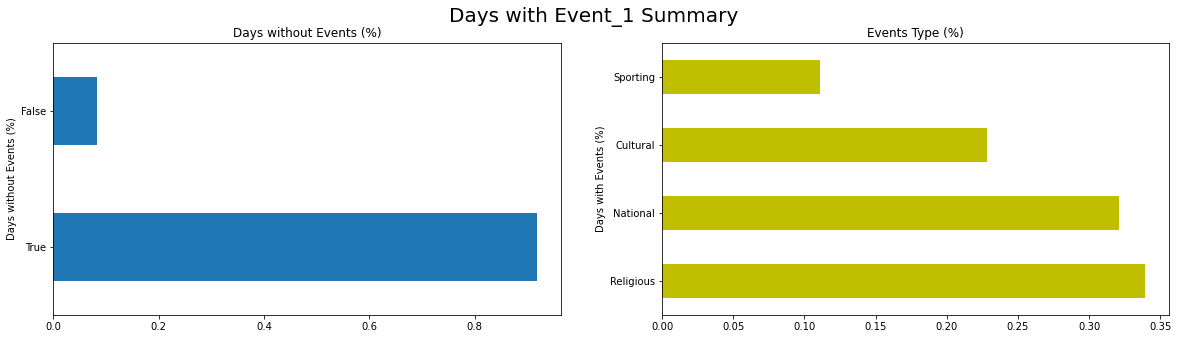

In [40]:
#visualizing days with event ,the type of event for event'-1 with matplotlib

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,5))
fig.suptitle("Days with Event_1 Summary", fontsize=20)

calendar_df["event_name_1"].isnull().value_counts(normalize=True)\
                                                .plot(kind="barh", xlabel="Days without Events (%)", ax=ax1, title="Days without Events (%)")

calendar_df["event_type_1"].value_counts(normalize=True)\
                                                .plot(kind="barh", xlabel="Days with Events (%)", ax=ax2, color='y', title="Events Type (%)")

In [41]:
calendar_df["event_name_2"].unique()

array([nan, 'Easter', 'Cinco De Mayo', 'OrthodoxEaster', "Father's day"],
      dtype=object)

In [42]:
calendar_df["event_type_2"].unique()

array([nan, 'Cultural', 'Religious'], dtype=object)

<AxesSubplot:title={'center':'Events Names (%)'}, ylabel='Event Name'>

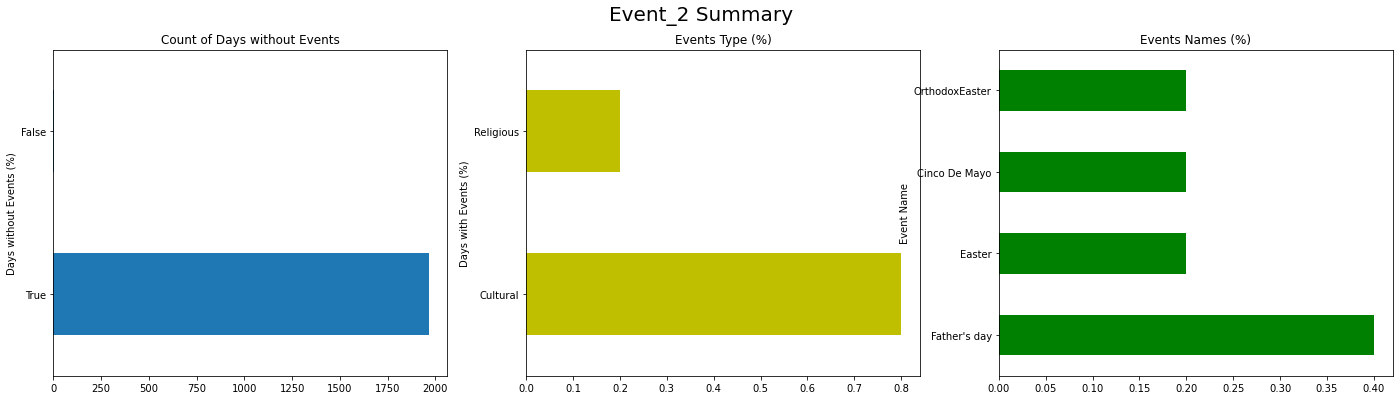

In [43]:
# visualizing days with event ,the type of event and the event name for event'-2 with matplotlib

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(24,6))
fig.suptitle("Event_2 Summary", fontsize=20)

calendar_df["event_name_2"].isnull().value_counts()\
                                                .plot(kind="barh", xlabel="Days without Events (%)", ax=ax1, title="Count of Days without Events")

calendar_df["event_type_2"].value_counts(normalize=True)\
                                                .plot(kind="barh", xlabel="Days with Events (%)", ax=ax2, color='y', title="Events Type (%)")

calendar_df["event_name_2"].value_counts(normalize=True)\
                                                .plot(kind="barh", xlabel="Event Name", ax=ax3, color='g', title="Events Names (%)")

<AxesSubplot:title={'center':'Snap WI '}, ylabel='snap WI summary'>

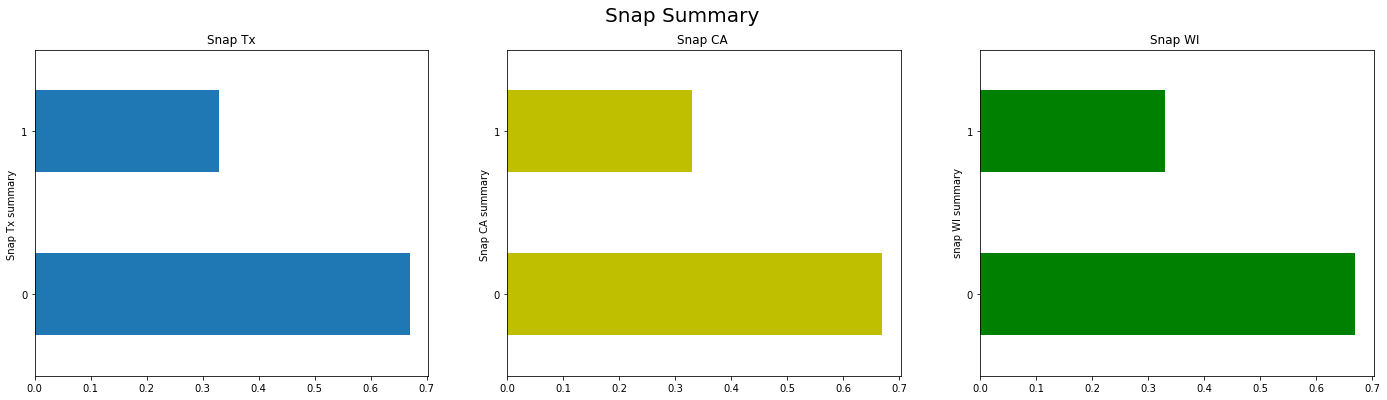

In [44]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(24,6))
fig.suptitle("Snap Summary", fontsize=20)

calendar_df["snap_TX"].value_counts(normalize=True)\
                                                .plot(kind="barh", xlabel="Snap Tx summary ", ax=ax1, title="Snap Tx")

calendar_df["snap_CA"].value_counts(normalize=True)\
                                                .plot(kind="barh", xlabel="Snap CA summary ", ax=ax2, color='y', title="Snap CA ")

calendar_df["snap_WI"].value_counts(normalize=True)\
                                                .plot(kind="barh", xlabel="snap WI summary", ax=ax3, color='g', title="Snap WI ")